In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9042/26532/117941/'>link</a>
<br>Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [36]:
# t_df = pd.read_csv('transaction_data.csv', parse_dates=['date'])
t_df = pd.read_csv('transaction_data.csv')
t_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [37]:
# t_df.date = pd.to_datetime(t_df.date)
# t_df.head()

In [38]:
print(f'date na count: {t_df.isna().date.sum()}')
print(f'name na count: {t_df.isna().name.sum()}')
print(f'transaction na count: {t_df.isna().transaction.sum()}')

date na count: 0
name na count: 0
transaction na count: 0


In [39]:
t_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [41]:
t_df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9042/26532/117942/'>link</a>
<br>Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [48]:
transaction_count = t_df.groupby('transaction', as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'counts'}) \
    .sort_values('counts', ascending=False)

In [49]:
transaction_count

,transaction,counts
2,successfull,3692
0,cancelled,1619
1,error,4


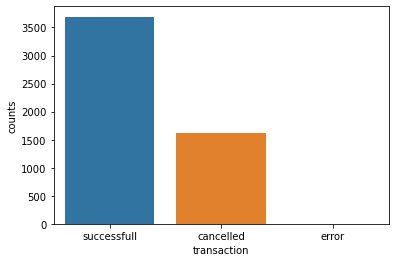

In [53]:
ax = sns.barplot(data=transaction_count, x='transaction', y='counts', order=transaction_count.transaction)

#ax.set_yscale('log')

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9042/26532/117945/'>link</a>
<br>Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций
Выберите верные утверждения.

<br>Пользователи в среднем совершили примерно по 66 транзакций
<br>Максимальное число транзакций – 82
<br>Пользователи в среднем совершили по 64 транзакции
<br>Примерно 25% пользователей совершили менее 61 транзакции
<br>Примерно 25% пользователей совершили более 61 транзакции
<br>Пользователи в среднем совершили примерно по 56 транзакций
<br>Максимальное число транзакций – 112
<br>Пользователи в среднем совершили примерно по 94 транзакции


In [62]:
user_transactions = t_df.query('transaction == "successfull"') \
    .groupby(by='name', as_index=False) \
    .agg({'transaction':'count'}) \
    .sort_values('transaction', ascending=False)

user_transactions.head()

,name,transaction
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


In [61]:
user_transactions.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [75]:
user_transactions.transaction.median()

64.0

In [76]:
user_transactions.transaction.mean()

65.92857142857143

<AxesSubplot:ylabel='Count'>

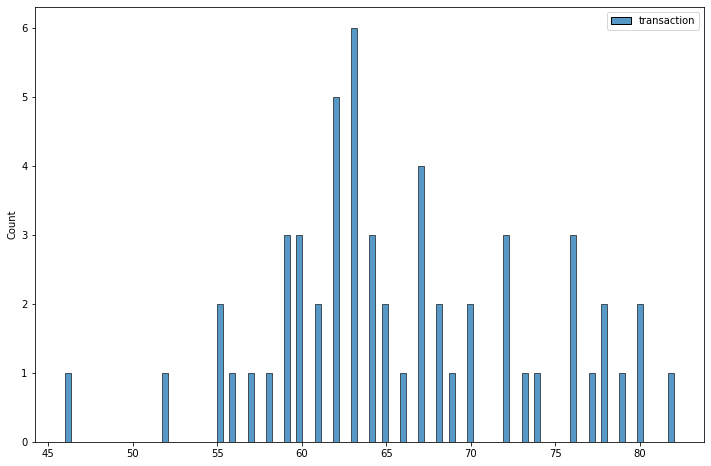

In [74]:
plt.figure(figsize=(12,8))
sns.histplot(data=user_transactions, bins=100)

<br>Пользователи в среднем совершили примерно по 66 транзакций
<br>Максимальное число транзакций – 82
<br>Примерно 25% пользователей совершили менее 61 транзакции

Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9042/26532/117946/'>link</a>
<br>К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

<br>столбцы – имена пользователей
<br>строки – минута времени осуществления операции (minute)
<br>значения – число совершённых операций
<br>Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем


In [80]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates=['date'])

In [81]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [87]:
df.name.nunique()

56

In [107]:
user_vs_minute_pivot = df.groupby(by=['name', 'minute'], as_index=False) \
    .agg({'transaction':'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)

In [109]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [101]:
# user_vs_minute_pivot = df[['name','transaction','minute']] \
#     .pivot_table(columns='name', index='minute', fill_value=0, aggfunc='count', dropna=0) \
#     .reset_index().reset_index()
#user_vs_minute_pivot.head()

Step 9 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9042/26532/117948/'>link</a>
<br>Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

In [119]:
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [123]:
df['true_minute'] = df.date.dt.hour * 60 + df.date.dt.minute

In [124]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [131]:
user_vs_true_minute_pivot = df.groupby(by=['name', 'true_minute'], as_index=False) \
    .agg({'transaction':'count'}) \
    .pivot(index='true_minute', columns='name', values='transaction') \
    .fillna(0)

user_vs_true_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
true_minute,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0


<AxesSubplot:ylabel='Count'>

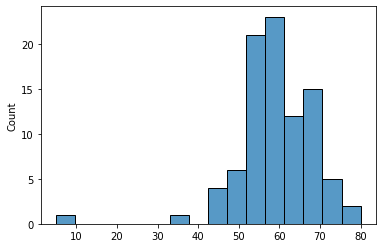

In [133]:
sns.histplot(user_vs_true_minute_pivot.sum(axis=1))